[![colab-logo](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/japan-medical-ai/medical-ai-course-materials/blob/master/notebooks/Introduction_to_ML_libs.ipynb)

# 機械学習ライブラリの基礎

ここでは，代表的な機械学習アルゴリズムの紹介とその使い方のポイントを数学的な背景と合わせて紹介していきます．
機械学習の考え方を身に着ける練習として，**単回帰分析**と**重回帰分析**のアルゴリズムを数式と一緒に考えていきましょう．これらを学ぶことで微分と線形代数，統計の使い方が見えてくると思います．重回帰分析は次章で紹介するニューラルネットワークでもその考え方のベースになるところが多いため，しっかりと数式を理解しておきましょう．

## 単回帰分析

まずはじめに，機械学習の中でも最も基礎的な単回帰分析について説明します．機械学習アルゴリズムは，**教師あり学習**と**教師なし学習**に大別され，単回帰分析は教師あり学習の一種です．教師あり学習の典型的な問題として，10や0.1のように数値（厳密には連続値）を予測する**回帰**と，赤ワイン or 白ワインのようにカテゴリ値を予測する**分類**があります．単回帰分析はその名の通り，回帰を取り扱う手法で，ひとつの入力変数からひとつの出力変数を予測する機械学習アルゴリズムです．

### 問題設定

機械学習では，データをもとに学習を行いますが，データに含まれる情報の中から何を利用し，何を予測させるかは人間が決める必要があります．

ここでは例として，家賃を予測する問題を考えることにします．従って，家賃が**出力変数** $y$ となります．

次に，**入力変数**として何を採用するかを考えます．家賃の予測では，たとえば部屋の広さ，駅からの距離，犯罪発生率などを，入力変数として検討することができます．ここでは部屋の広さを入力変数 $x$ として採用することにしましょう．実際には，複数の入力変数候補があった際に，それらすべてを扱うことができるようなモデル化が一般的ですが，それは次の重回帰分析以降で紹介することにします．

機械学習のアルゴリズムでは，どの手法も大きく分けて次の3ステップで成り立っています．

- Step1: モデルを決める
- Step2: 目的関数を決める
- Step3: 最適なパラメータを求める

上記の3ステップについて，順に説明していきます．

### Step1. モデルを決める

まずStep1では**モデル**を決めます．モデルとは，出力変数 $y$ と入力変数 $x$ の関係性を**定式化**したものです．どのように定式化すれば，家賃をうまく予測することができるのでしょうか．このモデル設計は現在は人手で行うのが一般的であり，機械が自動的に決めてくれるわけではありません（最近ではAutoMLなど，モデルも自動決定する研究も進展してきています）

例えば，与えられたデータセットにおいて，家賃と部屋の広さの関係性が次のようになっていたとします．

![01.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/01.png)

この場合，部屋が広くなるほど，家賃が高くなるという関係がみられ．直線を予測に用いるのが妥当にみえます．

![02.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/02.png)

そこで今回は直線をモデルとして採用して，Step1のモデルを以下のように定式化します．
$$
y = wx + b
$$
ここで$w$は傾き，$b$は切片とよばれるパラメータです（機械学習では，傾きを**重み (weight)** $w$, 切片を**バイアス (bias)** $b$ という記号で表現するのが一般的です）．

単回帰分析では，このように直線 $y = wx + b$ と決めて，重みとバイアスの値をデータにうまくフィットするように調整していきます．この調整すべき変数のことを**パラメータ**と呼びます．今回は $w$ と $b$ がパラメータとなります．

多くの機械学習ではこのようなパラメータで特徴付けられたモデルを使い，与えられたデータセットに適合するように最適なパラメータを求めることが目標となります．ここでデータセットは，入力変数である部屋の広さ $x$ と**教師データ**となる家賃 $t$ の組からなるデータの集合です（本解説では，機械学習による予測値を $y$ ，教師データとして与えるものを $t$ ，と使い分けています）．

データセットは $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ として表されることもあります．ここで，添え字 $n$ ($n=1,2,\ldots,N$) は $n$ 番目の物件という意味であり，$N$ は全体の物件数のことです．この $N$ は**サンプル数**とよばれています．

ここで，この後の計算を楽に進めるために，**データの中心化**というテクニックを紹介します．下図に示すように，部屋の広さと家賃は両方とも正の値であるため，左のグラフのような形になります．中心化では，**平均を0**とした中央に配置するような変換の処理を施します．この中心化は多くのアルゴリズムで前処理として行うことが一般的です．厳密には前章で紹介した中心化込みのスケーリングがよく用いられます．
![03.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/03.png)

この中心化の処理を行う理由は下図のように，データの中心化によってバイアス $b$ が0となり，$y_{c} = wx_{c}$ のように，モデルをバイアス成分なしで表現することができるためです，これによって，調整すべきパラメータを**2つから1つ**に減らすことができます．
![04.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/04.png)

データの中心化は入出力の平均をデータの全体から引くことで実現されます．つまり，
$$
\begin{aligned}
x_{c} &= x - \bar{x} \\
t_{c} &= t - \bar{t}
\end{aligned}
$$
となります．例えば，具体的な数値で見ると，下図の通りです．
![05.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/05.png)

中心化後を示す添え字の $c$ に関しては表現が冗長となるため，今後はこの添え字を省略し，データの中心化を事前に行っていることを前提とします．この時，モデルは
$$
y = wx
$$
となり，単回帰分析の目標は，データセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ に基づいて，パラメータ $w$ を**適切**に調整することになります．

### Step2. 目的関数を決める

どれだけ目標を達成しているかを表す関数を**目的関数**とよびます．分野によっては**評価関数**ともよばれます．

今回は教師データと予測値が一致することが目標であり，それを表す目的関数として教師データと予測値の二乗誤差を使います．二乗誤差が0であるとき，またその時のみ$t = y$ となり，完璧な予測を達成しているといえます，$n$ 番目の物件に対する教師データ$t_{n}$ と予測値$y_{n}$の二乗誤差は
$$
(t_{n} - y_{n})^{2}
$$
となります．これを全物件で考慮する必要があるため，最終的な目的関数はその総和をとり，
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + (t_{N}-y_{N})^{2} \\
&=\sum^{N}_{n=1}\left( t_{n}-y_{n}\right)^{2}\\
\end{aligned}
$$
となります．また，Step1で決めたモデル
$$
y_{n} = wx_{n}
$$
を代入すると，目的関数は
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-wx_{n}\right)^{2}
$$
とパラメータを含んだ形式で表現することができます．このような関数を損失関数とよぶことを思い出してください．

### Step3. 最適なパラメータを求める 

最後は目的関数を最小化するようなパラメータを求めます．ここで，ある関数を最小化する点を求める方法として，微分が使えることを既に学んでいます．今回のような差の二乗の場合，微分して「傾き0」となる点が損失が$0$となる点です．目的関数の微分を求めると，次のようになります．
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}  &= \dfrac{\partial}{\partial w} { \sum^{N}_{n=1} ( t_{n}-wx_{n})^{2} }\\
\end{aligned}
$$
ここで，微分は**線形性**の性質を持っており，特に和の微分は，微分の和であることを利用して次を得ます．
$$
\dfrac{\partial}{\partial w} \mathcal{L}=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
ここで微分と総和 $\sum$ の記号が入れ替わっています．次に，和の各項をみると，
$$
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
の部分は$t_n - wx_n$とその二乗の**合成関数**になっていることがわかります．$u_{n} = t_{n} - wx_{n}$, $f(u_{n}) = u_{n}^{2}$ とおくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2} &=  \dfrac {\partial }{\partial w} f(u_{n}) \\
\Rightarrow \dfrac {\partial }{\partial w} f(u_{n}) &= \dfrac {\partial u_{n}}{\partial w} \dfrac{\partial f(u_{n})}{\partial w} \\
&=-x_{n} \times 2 u_{n}  \\
&= -2x_{n}( t_{n}-wx_{n} )
\end{aligned}
$$
が得られます．これより，
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}
&=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
\\&=-\sum^{N}_{n=1}2x_{n}\left( t_{n}-wx_{n}\right)
\end{aligned}
$$
となります．この微分の値が0となるように$w$を求めていくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w} \mathcal{L} &=0\\
-2\sum^{N}_{n=1}x_{n}\left( t_{n}-wx_{n}\right) &=0\\
-2 \sum^{N}_{n=1}x_{n}t_{n} + 2\sum^{n}_{n=1}wx^{2}_{n}&=0\\
-2\sum^{N}_{n=1}x_{n}t_{n}+2w\sum^{N}_{n=1}x^{2}_{n}&=0\\
w\sum^{N}_{n=1}x^{2}_{n}&=\sum^{n}_{n=1}x_{n}t_{n}\\
\Rightarrow w&=\dfrac {\displaystyle  \sum^{N}_{n=1}x_{n}t_{n}}{\displaystyle  \sum^{N}_{n=1}x^{2}_{n}}
\end{aligned}
$$
と求まりました．この求まったパラメータ $w$ を確認すると，与えられたデータセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ のみから決定できていることがわかります．

次に，例題にあげていた数値例でパラメータ $w$ を求めてみましょう．まずは，データの中心化を行うために，
$$
\begin{aligned}
\bar{x} &= \dfrac{1}{3} (1 + 2 + 3) = 2 \\
\bar{t} &= \dfrac{1}{3}(2 + 3.9 + 6.1) = 4
\end{aligned}
$$
とそれぞれの平均を求め，各変数に対して前処理として，中心化の処理を施すと，
$$
\begin{aligned}
x_{1} &= 1 - 2 = -1 \\
x_{2} &= 2 -2 = 0 \\
x_{3} &= 3- 2 = 1\\
t_{1} &= 2 - 4 = -2\\
t_{2} &= 3.9 - 4 = -0.1\\
t_{3} &= 6.1 - 4 = 2.1 
\end{aligned}
$$
となります．そして，中心化後の値を用いて，最適なパラメータ$w$を導出すると，
$$
\begin{aligned}
w &= \dfrac{\displaystyle \sum_{n=1}^{N}x_{n}t_{n}}{\displaystyle  \sum_{n=1}^{N}x_{n}^{2}} \\
&= \dfrac{x_{1}t_{1} + x_{2}t_{2} + x_{3}t_{3}}{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \\
&= \dfrac{-1 \times (-2) + 0 \times 0.1 + 1 \times 2.1}{(-1)^{2} + 0^2 + 1^2} \\
&= 2.05
\end{aligned}
$$
と求まりました．これで単回帰分析の学習が完了しました．この求まったパラメータを使用したモデルが**学習済みモデル**となります．

続いて，このモデルを使って新しいサンプルに対する予測をしてみましょう．これをモデルを使って入力から予測値を**推論**すると呼びます．例えば，新しいサンプル $x_{q}=1.5$ に対する予測値は次のように求まります，
$$
\begin{aligned}
y_{c} &= wx_{c} \\
y_{q} - \bar{t} &= w(x_{q}-\bar{x}) \\
\Rightarrow y_{q} &= w(x_{q}-\bar{x}) + \bar{t} \\
&= 2.05 \times (1.5 - 2) + 4 \\
&= 2.975
\end{aligned}
$$
以上が，単回帰分析の一連の手順となります．単回帰分析自体は単純な手法ですが，他の機械学習アルゴリズムも，基本的には同様の手順で進めていくことが出来ます．

## 重回帰分析

次に，多変数の入力変数を扱う重回帰分析を扱います．この重回帰分析を学ぶことで線形代数に関する知識が深まります．

重回帰分析は単回帰分析と同様に教師あり学習の一種であり，回帰を取り扱う手法です．問題設定は，ほとんど単回帰分析と同じですが，重回帰分析では入力変数の数が複数となります．つまり，複数の入力変数から出力変数を予測できるような機械学習アルゴリズムです．

### 問題設定

ここでは単回帰分析の場合と同様に家賃を予測する問題を考え，家賃を出力変数 $y$ とします．入力変数としては，単回帰分析では考慮しきれていなかった駅からの距離や犯罪発生率なども考慮していきます．例えば，部屋の広さ $x_{1}$, 駅からの距離 $x_{2}$, ..., 犯罪発生率 $x_{M}$ のように $M$ 個の入力変数があるとします．

単回帰分析と同様，以下の3ステップで学習していきます．

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

単回帰分析のモデルは，
$$
y = wx + b
$$
であり，$w$ を重み（weight），$b$ をバイアス (bias) と呼びました．重回帰分析では，この式を複数の入力変数へと拡張し，
$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$
のような**線形結合**の形で表します．この場合，各入力変数は独立に出力変数に影響を与えることを仮定しており，かなり単純なモデル化といえます．実際には，入力変数間に依存関係が存在する場合には，そのことを考慮してモデル化を行う必要があります．それについては今後説明していきます．

重回帰分析のモデルは総和を使って整理すると，
$$
y = \sum_{m=1}^{M} w_{m} x_{m} + b
$$
のように書くことができます．さらにここで，$x_0 = 1$，$w_0 = b$とおくと，
$$
\begin{aligned}
y&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b\\
&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+w_{0} x_{0}\\
&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
\end{aligned}
$$
のようにバイアス $b$ を包含することができます．そして，この式を整理していくと，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
w_{0} & w_{1} & \ldots  & w_{M}
\end{bmatrix}\begin{bmatrix}
x_{0} \\
x_{1} \\
\vdots  \\
x_{M}
\end{bmatrix}\\
&=\boldsymbol{w}^{T}\boldsymbol{x}
\end{aligned}
$$
のように，ベクトルの内積で表現することができます．また，今後取り扱う際には，$\boldsymbol{x}$ が前に来ているほうが計算上便利であるため，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
x_{0} & x_{1} & \ldots  & x_{M}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
&=\boldsymbol{x}^{T}\boldsymbol{w}
\end{aligned}
$$
として表現します．これが重回帰分析のモデルです．今回はパラメータとして $M+1$ 個の重み $\boldsymbol{w}$ を求めていきます．

### Step2. 目的関数を決める

単回帰分析では，教師データ$t$と予測値$y$の二乗誤差が小さいほど良い予測であるとし，その総和を目的関数として定めました．重回帰分析でも，予測値$y$を求めるということは同じであるため，次のような同じ目的関数を使います．
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}
\end{aligned}
$$
このように，**二乗誤差の総和**を単回帰分析同様，目的関数として採用します．単回帰分析では，これを
$$
\mathcal{L}=\sum^{N}_{n=1} ( t_{n} - y_{n})^{2}
$$
のように，総和の記号を使ってまとめていましたが，
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}\\
&=\begin{bmatrix} t_{1} - y_{1} & t_{2}-y_{2} & \ldots & t_{N}-y_{N} \end{bmatrix} \begin{bmatrix}
t_{1}-y_{1} \\
t_{2}-y_{2} \\
\vdots \\
t_{N}-y_{N}
\end{bmatrix}\\
&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right) 
\end{aligned}
$$
のようにベクトル使って表現することもできます．また，$\boldsymbol{y}$ に関して，
$$
\begin{aligned}
\boldsymbol{y}=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{x}_{1}^{T}\boldsymbol{w} \\
\boldsymbol{x}_{2}^{T}\boldsymbol{w} \\
\vdots  \\
\boldsymbol{x}_{N}^{T}\boldsymbol{w}
\end{bmatrix}
=\begin{bmatrix}
\boldsymbol{x}_{1}^{T} \\
\boldsymbol{x}_{2}^{T} \\
\vdots  \\
\boldsymbol{x}_{N}^{T}
\end{bmatrix}
\boldsymbol{w}
\end{aligned}
$$
のように書くことができます．これを整理すると，
$$
\begin{aligned}
\boldsymbol{y}&=
\begin{bmatrix}
x_{10} & x_{11} & x_{12} & \ldots  & x_{1M} \\
x_{20} & x_{21} & x_{22} & \ldots  & x_{2M} \\
\vdots  & \vdots  & \ddots  & \vdots  \\
x_{N0} & x_{N1} & x_{N{2}} & \ldots  & x_{NM}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
\boldsymbol{y}&=\boldsymbol{X}\boldsymbol{w}
\end{aligned}
$$
と表記できます．ここで，行（横）方向がサンプルを表しており，例えば各物件に対応します．列（縦）方向が入力変数を表しており，例えば，部屋の広さや駅からの距離などが入っています．もう少し具体的な数値で考えると，部屋の広さ $= 50m^{2}$ ，駅からの距離 $= 600 m$ ，犯罪発生率 $= 2$% のような $n$ 番目の物件の場合，
$$
\boldsymbol{x}_{n}^{T} = \begin{bmatrix}
1 & 50 & 600 & \cdots & 0.02
\end{bmatrix}
$$
のようにデータが行方向格納されているイメージです．先頭の $1$ はバイアスを包含する際に使用している $x_{0}$ であることに注意してください．

### Step3. パラメータを最適化する

それでは，（Step2で定めた）目的関数を最小化する，（Step1で定めた）モデルのパラメータを求めていきましょう．

まずは目的関数に関して，パラメータ $\boldsymbol{w}$ で表現できるように式変形を行うと，
$$
\begin{aligned}
\mathcal{L}&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right) \\
&=\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&= \left\{ \boldsymbol{t}^{T}-(\boldsymbol{X}\boldsymbol{w})^{T}\right\}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&=\left( \boldsymbol{t}^{T}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\right)\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right)
\end{aligned}
$$
となります．ここで，転置の公式 $(\boldsymbol{A}\boldsymbol{B})^{T} = \boldsymbol{B}^{T}\boldsymbol{A}^{T}$ を使っていることに注意しましょう．さらに分配法則を使って展開を進めていくと，
$$
\begin{aligned}
\mathcal{L}&=\boldsymbol{t}^{T}\boldsymbol{t}-\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{t} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$
となります．この目的関数に対しパラメータの$w$について偏微分をとりたいですが，その前にこの式はもう少し整理することができます．はじめに，
$$
(1)^T = 1
$$
というように，スカラーは転置しても同じです．上式の中で出てくる $\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}$ はスカラーなので，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}
$$
が成り立ちます．さらに，転置の公式 $(\boldsymbol{A}\boldsymbol{B}\boldsymbol{C})^T = \boldsymbol{C}^T\boldsymbol{B}^T\boldsymbol{A}^T$ より，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^T = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$
も成り立ちます．これより，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$
を導くことができます．目的関数を $\mathcal{L}$ とおくと，上の式を利用して，
$$
\begin{aligned}
\mathcal{L}=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$
とまとめることができます．ここで， $\boldsymbol{w}$ に関する偏微分を行っていくため， $\boldsymbol{w}$ 以外の定数項をまとめていくと，
$$
\begin{aligned}
\mathcal{L}&=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
&=\boldsymbol{t}^{T}\boldsymbol{t}-2\left( \boldsymbol{X}^{T}\boldsymbol{t}\right)^{T} \boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w} \\
&=c+\boldsymbol{b}^{T}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w} 
\end{aligned}
$$
のように，線形代数で学んだ $\boldsymbol{w}$ に関する二次形式（二次関数）で表現することができました．ここで，$\boldsymbol{A}= \boldsymbol{X}^{T}\boldsymbol{X}, \ \boldsymbol{b} =-2 \boldsymbol{X}^{T}\boldsymbol{t}, \ c=\boldsymbol{t}^{T}\boldsymbol{t}$ であり，$\boldsymbol{b}$ を転置の形式にした理由は，線形代数で学んだベクトルで微分の公式の形式に合わせるための工夫です．

それでは，目的関数を最小化することができるパラメータ $\boldsymbol{w}$ の求め方を考えましょう．先述の通り，目的関数はパラメータ $\boldsymbol{w}$に関して二次関数です．例えば，
$$
\begin{aligned}
\boldsymbol{w} = \begin{bmatrix}
w_{1} \\ w_{2}
\end{bmatrix}, 
\boldsymbol{A}=\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},\boldsymbol{b}=\begin{bmatrix}
1 \\
2
\end{bmatrix},c=1
\end{aligned}
$$
のように具体的な数値例で考えてみると，
$$
\begin{aligned}
\mathcal{L} &=
\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}+\boldsymbol{b}^{T}\boldsymbol{w}+c\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}
+\begin{bmatrix}
1 & 2
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}+1\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}
\begin{bmatrix}
w_{1}+2w_{2} \\
3w_{1}+4w_{2}
\end{bmatrix}+w_{1}+2w_{2}+1\\
&=w_{1}\left( w_{1}+2w_{2}\right) +w_{1}\left( 3w_{1}+4w_{2}\right) +w _{1}+2w_{2}+1\\
&=w^{2}_{1}+5w_{1}w_{2}+4w^{2}_{2}+w_{1}+2w_{2}+1 \\
\end{aligned}
$$
となり，$w_{1}, w_{2}$に関してそれぞれまとめると，
$$
\begin{aligned}
\mathcal{L}
&=w^{2}_{1}+\left( 5w_{2}+1\right) w_{1} + 
\left( 4w^{2}_{2}+2w_{2}+1\right) \\
&=4w^{2}_{2}+\left( 5w_{1}+2\right) w_{2}+\left( w^{2}_{1}+w_{1}+1\right) \end{aligned}
$$
のようにそれぞれの二次関数であることがわかります．

そして，二次関数であれば，下図のような形となります．

![06.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/06.png)

これを3次元でイメージすると，下図のようになります．

![08.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/08.png)

そして，目的関数である二乗誤差の総和が最小となる点では各変数で微分した時の傾きが0となります．

![07.png](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/07.png)

この例では，$w_{1}$ と $w_{2}$ の２つのパラメータの場合で考えましたが，これは $w_{0}$, $w_{1}$, $w_{2}$, $\ldots$, $w_{M}$ の場合でも同様に考えることができ，目的関数が最小となる点は
$$
\begin{cases}
\dfrac {\partial }{\partial w_{0}}\mathcal{L}=0\\
\dfrac {\partial }{\partial w_{1}}\mathcal{L}=0\\
\ \ \ \ \ \vdots \\
\dfrac {\partial }{\partial w_{M}}\mathcal{L}=0\\
\end{cases}
$$
となり，これをまとめると，
$$
\begin{aligned}
\begin{bmatrix}
\dfrac {\partial}{\partial w_{0}} \mathcal{L} \\
\dfrac {\partial}{\partial w_{1}} \mathcal{L} \\
\vdots  \\
\dfrac {\partial}{\partial w_{M}} \mathcal{L} \\
\end{bmatrix}&=\begin{bmatrix}
0 \\
0 \\
\vdots  \\
0 \\
\end{bmatrix} \\
\Rightarrow \dfrac {\partial}{\partial \boldsymbol{w}} \mathcal{L} &= \boldsymbol{0} \\
\end{aligned}
$$
のようにベクトルでの微分として表されます．あとは，上式を満たすように $\boldsymbol{w}$ を決めていきます．（下記の計算にはベクトルでの微分をはじめとして，線形代数で学んだ内容を活用しているため，計算途中がわからなくなった場合には，線形代数のパートを確認しながら進めてみてください．）
$$
\begin{aligned}
\dfrac {\partial }{\partial \boldsymbol{w}}\mathcal{L} =\dfrac {\partial }{\partial \boldsymbol{w}}\left( c+\boldsymbol{b}^{T}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right)
= \boldsymbol{0}\\
\dfrac {\partial }{\partial \boldsymbol{w}}\left( c\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{b}^{T}\boldsymbol{w}\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right) 
=\boldsymbol{0}\\
\boldsymbol{0}+\boldsymbol{b}+\left( \boldsymbol{A}+\boldsymbol{A}^{T}\right) \boldsymbol{w} =\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+\left\{ \boldsymbol{X}^{T}\boldsymbol{X} + \left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{T}\right\} \boldsymbol{w}
=\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+2\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{0}\\
\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{X}^{T}\boldsymbol{t}\\
\end{aligned}
$$
ここで，両辺に左側から $\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}$ をかけると，
$$
\begin{aligned}
\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{X} \boldsymbol{w} =\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{I}\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
\end{aligned}
$$
となり，与えられたデータセット $\boldsymbol{X}, \boldsymbol{t}$ から，最適なパラメータ $\boldsymbol{w}$ が求まりました．ここで，$\boldsymbol{I}$ は単位行列です．また，式変形の際には，
$$
\boldsymbol{w} = \dfrac{\boldsymbol{X}^{T}\boldsymbol{t}}{\boldsymbol{X}^{T}\boldsymbol{X}}
$$
のような分数が表れないように注意してください．これは行列の計算には割り算がないためです．そのため，逆行列を使って行列積のみで計算しています．

また，もうひとつよくある間違いとして，
$$
\begin{aligned}
\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{X}^{T}\boldsymbol{t}\\
\left( \boldsymbol{X}^{T}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}&=\left( \boldsymbol{X}^{T}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}\\
\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{t}\\
\boldsymbol{X}^{-1}\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{X}^{-1}\boldsymbol{t}\\
\boldsymbol{w}&=\boldsymbol{X}^{-1}\boldsymbol{t}
\end{aligned}
$$
のような式変形をする場合もみられます．しかし，これは一般的には成立しません．その理由として，線形代数の章で説明した逆行列を持つための条件として，**正方行列であること**を満たしていないためです．バイアス $\boldsymbol{b}$ を $\boldsymbol{w}$ に包含することを無視する場合 $\boldsymbol{X} \in \mathcal{R}^{N \times M}$ であり，バイアスの包含を考慮する場合は $\boldsymbol{X} \in \mathcal{R}^{N \times (M+1)}$ です．一般的に，サンプル数 $N$ と入力変数の数 $M$ は等しくないため，$\boldsymbol{X}$は正方行列ではなく，逆行列をもちません．それに対し，例えば，$\boldsymbol{X} \in \mathcal{R}^{N \times M}$ の場合，$\boldsymbol{X}^{T}\boldsymbol{X} \in \mathcal{R}^{M\times M}$ となり，サンプル数 $N$ に依存することなく，常に正方行列となります．（逆行列が求まるためにはもう少し厳密な条件があるので，さらに詳しく知りたい方は各自調べてみてください．）

推論の際は学習で得られたパラメータ $\boldsymbol{w}$ を用いて，
$$
y_{q} = \boldsymbol{w}^{T}\boldsymbol{x}_{q}
$$
のように計算することで予測値が得られます．

## Numpyによる実装

それでは重回帰分析を例に，Pythonで線形代数を用いた実装を行っていきましょう．Pythonには**Numpy**と呼ばれる線形代数を簡単に扱えるライブラリが存在し，広く利用されています．次の章で紹介するChainerの中でもNumpyは多用されており，ディープラーニングを学ぶための第一歩として，まずはNumpyの使い方を習得することが重要です．

Pythonの文法に関しては把握していることを前提に進めています．具体的には，変数（数値・文字列，リスト，タプル，辞書），制御構文（for，if），関数，クラスを理解している必要があります．

重回帰分析では，最終的に最適なパラメータ $\boldsymbol{w}$ が
$$
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
$$


で求まりました．この最適なパラメータを求めるために，以下の5つを扱います．

- ベクトルの定義
- 行列の定義
- 転置
- 行列積
- 逆行列

具体的に，以下のようなデータセットが与えられているケースを想定してみましょう．

$$
\boldsymbol{X} = 
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 3 & 4 \\  
1 & 5 & 9 
\end{bmatrix}, \
\boldsymbol{t} = 
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$

それぞれの実装について，見ていきましょう．まずは，Numpyの読み込みから始めます．

In [0]:
import numpy as np

ベクトルの定義は以下のように行います．

In [0]:
t = np.array([[1], [5], [6], [8]])

In [0]:
print(t)

[[1]
 [5]
 [6]
 [8]]


つぎに，行列の定義も行いましょう．

In [0]:
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])

In [0]:
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


ここで，Xの転置を行ってみましょう．Numpyの`array`で定義されている場合，`.T`をつけるだけで転置することができます．

In [0]:
print(X.T)

[[1 1 1 1]
 [2 2 3 5]
 [3 5 4 9]]


縦と横が入れ替わっていることを確認できます．

行列積は以下のように `np.dot` によって実現できます．行列積を行う際には，一番目の行列の列数と，二番目の行列の行数が同じであることに注意して下さい．

In [0]:
XX = np.dot(X.T, X)

In [0]:
print(XX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


この逆行列を求めるには，`np.linalg.inv` を用います．

In [0]:
XX_inv = np.linalg.inv(XX)

In [0]:
print(XX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


これで重回帰分析のために必要な演算が揃いました．最適なパラメータを求めると，

In [0]:
Xt = np.dot(X.T, t)

In [0]:
print(Xt)

[[ 20]
 [ 70]
 [124]]


In [0]:
w = np.dot(XX_inv, Xt)

In [0]:
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


このようにパラメータ $\boldsymbol{w}$ が求まりました．Numpyを使うことで，数式をそのままプログラミング上で書くことができます．

## Scikit-learnによる本格的な実装

重回帰分析であればNumpyで簡単に実装することができましたが，実践的に使用する機械学習アルゴリズムの多くは複雑であり，初学者が一から書くには難しい場合も少なくありません．そこで，Pythonでは**Scikit-learn**と呼ばれる機械学習用のフレームワークが公開されており，初学者でも簡単に機械学習を扱うことができます．

まずは重回帰分析をScikit-learnによって実装してみましょう．

### Scikit-learn 基礎編

Scikit-learnは`sklearn`という名前で呼び出すことができます．

In [0]:
import sklearn

たとえば，重回帰分析を使用する場合は以下のように呼び出します．

In [0]:
from sklearn.linear_model import LinearRegression

なお，使い方を調べる際には，[公式のリファレンス](http://scikit-learn.org/)に加えて，「重回帰分析 Scikit-learn」と検索して，実例のソースコードを見るほうが早い場合も多くあります．

重回帰分析のアルゴリズムはクラスとして定義されているので，インスタンス化を行います．

In [0]:
model = LinearRegression()

これだけで，重回帰分析を使用するための準備が完了です．パラメータの学習は以下のように行います．

In [0]:
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

結果の検証は，次のように行います．

In [0]:
model.score(X, t)

0.6923076923076926

分類の場合は**精度**，回帰の場合は**決定係数**とよばれる指標が自動的に計算されるようになっています．
このように，Scikit-learnでは，簡単なインターフェースでやり取りができるようになっています．Scikit-learnの良い点は，最初にアルゴリズムを決めてしまえば，どのアルゴリズムでも，`.fit`で学習，`.score`で検証が行える点です．

また，アルゴリズムによって内容は多少異なりますが，パラメータもインスタンス変数として格納されているため，学習後に確認することができます．

In [0]:
# パラメータw
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [0]:
# バイアスb
model.intercept_

array([-0.14285714])

この例からわかるように，Scikit-learnでは，パラメータとバイアスがそれぞれ準備されているため，入力変数 $\boldsymbol{X}$ の左端の列に1を格納した変数を入れる必要がありません．

### Scikit-learn 応用編

Scikit-learnは機械学習の実装を支援する多くの機能を兼ね備えています．

まず最初にサンプルのデータセットの取り扱いを紹介します．Scikit-learnにサンプルのデータセットがいくつか提供されています．今回はその中から，`load_boston`というボストン近郊の家賃に関するデータセットを使用しましょう．

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

変数の`boston`には辞書と同じ形式で格納されており，変数の中身を見ながら入力変数と教師データに対応するものを見つけていきます．

In [0]:
X = boston['data']
t = boston['target']

In [0]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [0]:
print(t)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Numpyの形式で入力変数と教師データが格納されており，`.shape`を使うことで行と列の数を確認できます．

In [0]:
X.shape

(506, 13)

In [0]:
t.shape

(506,)

つぎに，**訓練データ**と**検証データ**の分割です．学習の時と同じデータを使って性能を検証した場合，モデルが学習データだけをうまくモデル化し，同じような分布からとられた未知のデータはうまくいかない場合があります．これを**過学習**とよびます．機械学習ではこれを防ぐために学習データと別に性能を評価する検証データを分けて評価します．このように分割して検証することを**ホールドアウト法**とよびます．

Scikit-learnでは訓練用と検証用を分割する機能が用意されています．

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
X_train.shape

(354, 13)

In [0]:
X_test.shape

(152, 13)

引数の`test_size`は検証用に使うデータの比率であり，0.3と指定すると全体の30%が検証データとなります．また，`random_state`は乱数のシードであり，再現性を確保するためのものです．なぜ乱数が登場するかというと，前から70%を訓練用，残りを検証用とするのではなく，全体からランダムに選択した70%を訓練用，残り30%を検証用と選択しているためです．

訓練データを用いて学習します．

In [0]:
model = LinearRegression()

In [0]:
model.fit(X_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

検証を行う場合は，訓練データと検証データの両方に対してチェックしておくと良いでしょう．

In [0]:
# 訓練データ
model.score(X_train, t_train)

0.7644563391821222

In [0]:
# 検証データ
model.score(X_test, t_test)

0.673528086534723

検証データだけでなく，訓練データでも検証することで学習に失敗している場合の問題を切り分けることができます．

|訓練データ|検証データ|結果|
|:--|:--|:--|
|×|×|アンダーフィッティング|
|〇|×|オーバーフィッティング|
|〇|〇|ＯＫ|

**アンダーフィッティング**の場合，現状の機械学習アルゴリズムでうまくデータの特徴を捉えられていないと考えられ，アルゴリズムを変更したり，入力データの特徴をより適切に表現できるような変換を考えます．逆に**オーバーフィッティング**の場合，アルゴリズムでデータの特徴をある程度捉えられていることは確認できているので，モデルが過学習しないように対策していきます．代表的な方法として，**ハイパーパラメータ**と呼ばれる各アルゴリズムのパラメータ学習に使われるパラメータ値を調整していくことで解決できる場合があります．このように，望ましい結果が得られない中にも，それぞれの状況を把握することで次に打つべき対策が変わってくるため，訓練データと検証データの両方に対する検証を行うことは重要であることが分かります．

また，Scikit-learnでは，スケーリングも行うことができます．例えば，平均0，標準偏差1に変換するデータ正規化を行う場合の手順は以下の通りです．

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# インスタンス化
scaler = StandardScaler()

In [0]:
# 平均の分散（標準偏差）を学習
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 変換
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [0]:
print(X_train_s)

[[-0.20416267 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38584317  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33266283 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38147768 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.3720831  -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38289844 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [0]:
print(X_test_s)

[[-0.39152624 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70825498 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38588517 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.6177735  -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34043865 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39601293 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]


## 実用的な機械学習アルゴリズムの紹介

ここからは，実践的に活用されている機械学習アルゴリズムについて特徴とともに紹介していきます．ここでは概要の紹介のみ行うため，気になった場合は参考図書を見て学びを深めてください．

Scikit-learnを使うことによって実装は非常に手軽に行うことができますが，数式を理解していないがゆえに，うまくいかないときの対処法がわからないという問題も出てきます．ここでは，この問題につまずかないように，ハイパーパラメータのチューニングも併せて紹介していきます．

### Support Vector Machine (SVM)

SVMは実用的によく使われる手法の一つであり，入出力間の非線形性を捉えることができます．ただし，非線形なモデルの場合，$y = wx^2$や，$y = w\sin(x)$やその重ね合わせといったように，組み合わせの候補が無限に存在するため，モデルの設計が難しくなります．事前にある程度，入出力間の関係性が把握できていれば定式化のアイディアも存在しますが，そのような事前知識があるような状況は，そう多くはありません．

そこで，SVMでは**カーネルトリック**と呼ばれるテクニックを利用して，データ間の類似度（カーネル）から入出力間の非線形性の定式化を行います．

SVMには連続値を予測する**回帰 (Regression)** とカテゴリを予測する**分類 (Classification)** の両方に対応した手法があります．それぞれ，**，Support Vector Regression (SVR)** と **Support Vector Classification (SVC)** と呼びます．まずは回帰の問題設定で紹介し，前回と同様，ボストン近郊の家賃予測の例題を取り扱います．

#### Support Vector Regression (SVR)

In [0]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
# モデルのインスタンス化，学習
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.14680479454958428

In [0]:
# 検証（検証データ）
model.score(X_test, t_test)

0.01018093344367077

このようにSVRも，Scikit-learnを用いることで重回帰分析のケースとほとんど同じように実装できます．

しかし結果をみると，重回帰分析に比べて良くなっているとは言えません．ハイパーパラメータ調整が必要そうですが，その前に，スケーリングを行うことで改善できる場合もあります．


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [0]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.697669153907031

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.5540391127752358

スケーリングにより，大幅に結果を改善することができました．機械学習アルゴリズムには，スケーリングの影響を受けやすいものとそうでないものが存在し，SVRを含むSVMは影響を受けやすいアルゴリズムといえます．

最後に，さらに精度を向上させるためにハイパーパラメータの調整を行います．ただしその際，注意点があります．それは，訓練データ（train）はパラメータの調整に用いますが，検証データ（test）を見ながらハイパーパラーメータの調整を行ってはいけないということです．検証データはあくまで未知のデータに対する性能検証を行うために用意したものであり，ハイパーパラメータの調整に使用してしまうと検証データの情報が学習にリークして，正しい検証ができなくなります．

そこで，ハイパーパラメータの調整用に**バリデーションデータ**（val）を追加することが一般的です．

![](https://github.com/hillbig/medical-ai-course-materials/blob/master/notebooks/images/2/09.png?raw=1)

また，**交差検証法（クロスバリデーション）**という手法もあります．これは下図に示すように，データに対して複数パターンの分割を行い，それらの性能の平均を評価する手法です．

![](https://github.com/hillbig/medical-ai-course-materials/blob/master/notebooks/images/2/10.png?raw=1)

この分割数 $K$ としたものは特に，**K-fold Cross Validation (CV)**と呼ばれます．上記の例だと $K=3$ です．

それでは，SVRのハイパーパラメータ調整を交差検証法も使いながら行っていきます．Scikit-learnではハイパーパラメータ調整のための機能も`GridSearchCV`という名前で用意されています．**グリッドサーチ**とは各組合せをすべて試す探索方法です．それ以外にも，**ランダムサーチ**や**ベイズ最適化**による探索などの方法もあります．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [0]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

交差検証法とハイパーパラメータのグリッドサーチはこれで完了です．各ハイパーパラメータでの結果も確認することができ，最も結果の良かったハイパーパラメータの値を引き継いだモデルの選択もできます．

In [0]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -40.88957, std: 12.03388, params: {'C': 1, 'gamma': 0.01},
 mean: -34.94548, std: 12.18057, params: {'C': 1, 'gamma': 0.1},
 mean: -72.62060, std: 15.99632, params: {'C': 1, 'gamma': 1},
 mean: -86.25200, std: 16.38372, params: {'C': 1, 'gamma': 10},
 mean: -17.67763, std: 6.48783, params: {'C': 10, 'gamma': 0.01},
 mean: -16.46703, std: 7.03969, params: {'C': 10, 'gamma': 0.1},
 mean: -43.71719, std: 13.22953, params: {'C': 10, 'gamma': 1},
 mean: -81.13324, std: 15.21847, params: {'C': 10, 'gamma': 10},
 mean: -13.83363, std: 3.54540, params: {'C': 100, 'gamma': 0.01},
 mean: -14.61609, std: 7.20850, params: {'C': 100, 'gamma': 0.1},
 mean: -37.47299, std: 9.87515, params: {'C': 100, 'gamma': 1},
 mean: -77.95797, std: 12.36436, params: {'C': 100, 'gamma': 10}]

In [0]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7685336670918761

ここまでがアルゴリズムの実践的な調整です．実際には特徴量の選択や外れ値除去など前処理も込みで行うため，ここまでシンプルに完了できるものではありませんが，まずはこの流れを覚えてください．

1. スケーリング無　score:0.010
2. スケーリング有　score:0.554
3. スケーリング＋ハイパーパラメータの調整有　0.7685

#### Support Vector Classification (SVC)

次に，SVMの分類であるSVCも同様にスケーリングからハイパーパラメータの調整まで行ってみます．ここでは分類の例題として，Scikit-learnで用意されているデータセットの中から，乳がんの患者か否かを予測する問題を扱います．

In [0]:
# データセットの準備
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [0]:
X.shape

(569, 30)

In [0]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [0]:
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

入力変数のスケールは統一されていないことがわかります．

In [0]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
# スケーリング無で学習
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# 検証（訓練データ）
model.score(X_train, t_train)

1.0

In [0]:
# 検証（訓練データ）
model.score(X_test, t_test)

0.631578947368421

分類では精度 (Accuracy) と呼ばれる指標の結果が得られます．例えば，100問中3問間違えると，精度は0.97となります．

次にスケーリングを行った後に学習させていきましょう．

In [0]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [0]:
# スケーリングしたデータを用いて学習
model.fit(X_train_s, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9824120603015075

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

このように精度が大幅に向上したことがわかります．

最後にハイパーパラメータのチューニングも行っていきましょう．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [0]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVC(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96482, std: 0.01272, params: {'C': 1, 'gamma': 0.01},
 mean: 0.95226, std: 0.01543, params: {'C': 1, 'gamma': 0.1},
 mean: 0.62814, std: 0.00310, params: {'C': 1, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 1, 'gamma': 10},
 mean: 0.97487, std: 0.01972, params: {'C': 10, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 10, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 10, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 10, 'gamma': 10},
 mean: 0.94975, std: 0.01981, params: {'C': 100, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 100, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 100, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 100, 'gamma': 10}]

In [0]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9883040935672515

ハイパーパラメータの調整により，多少ですが精度を改善することができました．

### Random Forest

続いて紹介するのは，決定木 (Dicision Tree) のアンサンブル学習であるランダムフォレストです．こちらも実用上良く使われる手法であり，ランダムフォレストを含めた決定木系の手法には，入力変数のスケールの違いによる影響をあまり受けないという特徴があります．また，**カテゴリカル変数**と呼ばれる定量評価を行うことが難しい変数（例えば，男性 or 女性）も定量化を気にすることなく扱うことができるメリットがあります．回帰，分類のどちらも用意されているため，それぞれについて紹介していきましょう．

#### 回帰 (Regression)

In [0]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9683509759630142

In [0]:
# 検証（検証データ）
model.score(X_test, t_test)

0.8244110898822086

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [0]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.980773304078463

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7568763837538154

このように，スケーリングによる影響はほとんど受けないことを，実際に確認できました．

またランダムフォレストでは，条件分岐させる数である `max_depth` をハイパーパラメータとして調整することが多いため，今回はこちらを調整していきましょう．

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [0]:
# 交差検証法を使用したハイパーパラメータの各組み合わせでの学習
model_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -41.89307, std: 9.40057, params: {'max_depth': 1},
 mean: -25.95305, std: 8.05238, params: {'max_depth': 2},
 mean: -23.11041, std: 4.68079, params: {'max_depth': 3},
 mean: -17.92487, std: 4.42161, params: {'max_depth': 4},
 mean: -19.30415, std: 7.51230, params: {'max_depth': 5},
 mean: -17.16534, std: 8.32303, params: {'max_depth': 6}]

In [0]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 6}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.8065343207878718

今回はもともとオーバーフィッティングしていなかったため，ハイパーパラメータの調整によって改善することはありませんでしたが，オーバーフィッティングしている場合には有効な施策となります．

またランダムフォレストの大きなメリットとして，各入力変数がどの程度重要であるかを定量評価した値が得られます．

In [0]:
# 各入力変数の重要度
model.feature_importances_

array([0.03498355, 0.00122218, 0.00721576, 0.00092089, 0.00898805,
       0.39898526, 0.01894469, 0.04598164, 0.00571163, 0.01607173,
       0.01889314, 0.00701622, 0.43506524])

総和が1になっており，この値を使って各入力変数がどれだけ重要か判断することができます．

#### 分類 (Classification)

In [0]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9949748743718593

In [0]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9415204678362573

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [0]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

1.0

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9473684210526315

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [0]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91206, std: 0.01259, params: {'max_depth': 1},
 mean: 0.93467, std: 0.01763, params: {'max_depth': 2},
 mean: 0.93467, std: 0.01265, params: {'max_depth': 3},
 mean: 0.95226, std: 0.01543, params: {'max_depth': 4},
 mean: 0.93970, std: 0.02119, params: {'max_depth': 5},
 mean: 0.93970, std: 0.01632, params: {'max_depth': 6}]

In [0]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 4}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9590643274853801

In [0]:
# 各入力変数の重要度
model.feature_importances_

array([4.55728165e-03, 4.80674523e-03, 7.04751333e-02, 6.67175039e-02,
       0.00000000e+00, 6.38391868e-03, 1.44783793e-01, 2.56851226e-02,
       1.01592678e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.17633429e-03, 3.57428435e-02, 5.48903143e-05, 7.63635594e-03,
       8.65354259e-03, 3.50041088e-03, 4.29368206e-03, 4.42019691e-03,
       8.32478506e-02, 1.93259510e-02, 1.79759936e-01, 8.96864960e-02,
       4.76915506e-03, 2.20744844e-02, 6.78042092e-02, 1.24987366e-01,
       4.10480850e-03, 8.33606129e-03])

### ロジスティック回帰

シンプルですが，良く利用される手法のひとつです．回帰という名前がついていますが，問題設定としては分類に属する点に注意しましょう．

In [0]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [0]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [0]:
# モデルのインスタンス化，学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.957286432160804

In [0]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9649122807017544

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [0]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9899497487437185

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [0.01, 0.1, 1, 10]}
]

In [0]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(LogisticRegression(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96985, std: 0.01223, params: {'C': 0.01},
 mean: 0.97990, std: 0.00935, params: {'C': 0.1},
 mean: 0.98492, std: 0.01624, params: {'C': 1},
 mean: 0.97236, std: 0.02323, params: {'C': 10}]

In [0]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 1}

In [0]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [0]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

新しいサンプルに対する推論を行ってみましょう．Scikit-learnでは，推論には`predict`を使用します．

In [0]:
# 訓練データの一番最初のサンプルで試しに推論
x_pred = [X_train_s[0]]
y = model.predict(x_pred)

In [0]:
print(y)

[1]


また，各カテゴリに属する確率まで求める際には， `predict_proba` を使用します．

In [0]:
y = model.predict_proba(x_pred)

In [0]:
print(y)

[[0.00160119 0.99839881]]


結果からわかる通り，各カテゴリの確率の総和が1となっており，確率が大きいほうのカテゴリ1が選ばれたことがわかります．正常か異常かといった分類の場合，正常or異常だけでなく，どのくらい異常そうであるかの確率までわかることで，閾値を設けやすくなります．この特性は次の章で紹介するニューラルネットワークでも同じです．

### k-means

最後に，教師なし学習である**クラスタリング**手法として有名なk-meansを紹介します．分類では教師データとしてどのカテゴリに属しているかがわかっていましたが，クラスタリングではその教師データがない状況で学習を行います．距離的に近いものをまとめるといった特性を持っています．

例題では2つのクラスターからなるデータをあらかじめ用意しておき，正しく分けられるかを確認していきましょう．

In [0]:
np.random.seed(0)

In [0]:
X1 = np.random.randn(50, 2) - 3
X2 = np.random.randn(50, 2) + 3

In [0]:
# 結合
X = np.r_[X1, X2]

In [0]:
X.shape

(100, 2)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

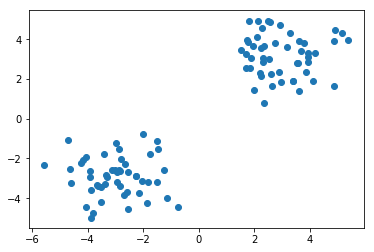

In [0]:
plt.scatter(X[:, 0], X[:, 1])

それでは，k-meansを用いてクラスタリングを行いましょう．クラスタリングでは分けるクラスターの数がハイパーパラメータとして必要であることが一般的であり，`n_clusters`で指定します．

In [0]:
from sklearn.cluster import KMeans

In [0]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

学習したモデルをもとにクラスタリングを行いましょう．

In [0]:
y = model.predict(X)

In [0]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Numpyを使って条件に当てはまるサンプルだけを抽出し，結果を可視化してみましょう．

In [0]:
X0 = X[y==0]
X1 = X[y==1]

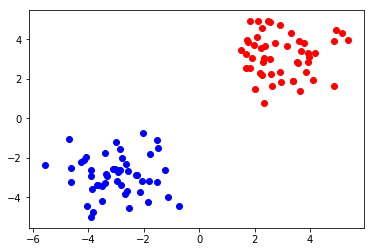

In [0]:
plt.scatter(X0[:, 0], X0[:, 1], color='red')
plt.scatter(X1[:, 0], X1[:,1 ], color='blue')